In [5]:
import numpy as np
import matplotlib.pylab as plt
from scipy.signal import bessel, butter, filtfilt,  fftconvolve
#import scipy.io as sio
from neo import io
import csv
#import quantities as pq
from scipy.optimize import curve_fit
from numpy import apply_along_axis as apply 
from scipy.stats.mstats import mquantiles
from numpy.linalg import svd
from sklearn.cluster import KMeans
%matplotlib inline  
plt.ion()

plt.rcParams['agg.path.chunksize'] = 1000000
file_to_import="040826_001.wcp"
r = io.WinWcpIO( filename = file_to_import)
bl = r.read_block(lazy = False, cascade = True)
data_t = bl.segments[0].analogsignals[1]

n_rec=np.size(bl.segments)
dt=5.09e-5

data_t=[]
for i in range(0,n_rec):
    y=bl.segments[i].analogsignals[1]
    data_t=np.hstack((data_t,y))

data_x=np.linspace(0, np.size(data_t)*dt, np.size(data_t))

data_t=np.asarray(data_t)
print(data_x[-1], "seconds long" )


(1882.5800703999998, 'seconds long')


In [15]:
np.set_printoptions(precision=3)
[mquantiles(data_t,prob=[0,0.25,0.5,0.75,1])] #for x in data]
[np.std(data_t)] #for x in data]
[np.min(np.diff(np.sort(np.unique(data_t))))] #for x in data]
data_mad=np.median(np.absolute(data_t - np.median(data_t)))*1.4826
print (data_mad)
data = (data_t-np.median(data_t))/data_mad


#---filtering----
fc_l = 2000  # low pass filter frequency
fc_h = 300   # high pass filter frequency
freq=1./dt
fc_l = fc_l/freq  # normalized frequency
fc_h = fc_h/freq  # normalized frequency
Wn = [fc_h, fc_l]
N=4          #  number of poles

#----notch filter-----------
#Wn_n = [49./freq, 51./freq]             # comment to remove notch
#b, a = butter(4, Wn_n, 'bandstop')      # comment to remove notch
#data_filtered = filtfilt(b, a, data)    # comment to remove notch
#----butter band pass filter----
b, a = butter(N, Wn, 'bandpass')
data_filtered = filtfilt(b, a, data_t)  
#data_red = np.copy(data_filtered)
#data_red[data_red > thre] = 0

#---peak detection----
thre=-.3  # detection threshold
peaks_p= (np.diff((data_filtered < thre)*1)==1).nonzero()[0]
peaks_n= (np.diff((data_filtered < thre)*1)==-1).nonzero()[0]
sp0=[t0+np.argmin(data_filtered[t0:t1]) for t0,t1 in zip(peaks_p,peaks_n)]
print(np.shape(sp0))

#plt.figure()
#plt.plot(np.diff(sp0))

0.0850638751611
(6776,)


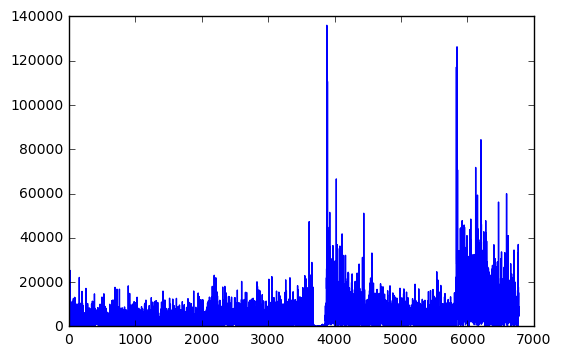

In [16]:
plt.figure()
plt.plot(np.diff(sp0))

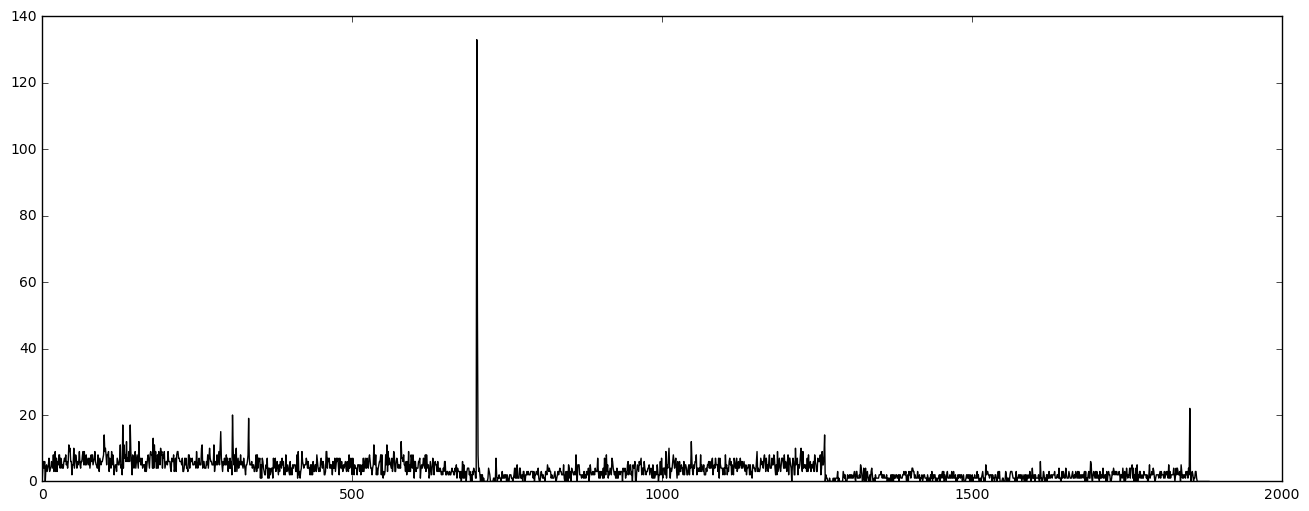

In [17]:

#-----rate calculation-----------
#---------------------------------
time_event= 1 #tiempo evento en segundos
plt.figure(figsize=(16,6))
n_bin=np.int(np.round(data_x[-1]/time_event))

point = np.nonzero(np.array(sp0))
rate=[]
t_bins=np.arange(n_bin)
t_bins=t_bins*time_event
times = data_x[sp0]
for i in range (n_bin):
    t_i=i*time_event
    t_f=(i+1)*time_event-1
    isi_bin=np.nonzero(times[point]<t_f)
    rate.append(np.shape(isi_bin)[1])
rate_1=rate[0]/time_event
rate_2=np.diff(np.asarray(rate))
rate_2=rate_2/time_event
rate_2=np.insert(rate_2,0,rate_1)
plt.plot(t_bins,rate_2,"k")
#plt.ylim(0,10)